In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [101]:
USERNAME = "Fareed04"

In [102]:
import os
import matplotlib.pyplot as plt

# Ensure the reports/figures directory exists in the correct location
base_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Moves up one level to project root
figures_path = os.path.join(base_dir, "reports", "figures")

os.makedirs(figures_path, exist_ok=True)  # Creates the directory if it doesn't exist

def save_figure(filename):
    """Saves the current matplotlib figure to the reports/figures folder."""
    filepath = os.path.join(figures_path, filename)
    plt.savefig(filepath, dpi=300, bbox_inches="tight")
    print(f"Saved: {filepath}")

# Test by printing the path
print(f"Figures will be saved to: {figures_path}")


Figures will be saved to: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures


### Data Exploration - Loading the dataset and understanding the structure of the data

In [103]:
data = pd.read_csv("../data/chess_games_raw.csv")
data.head()

,url,pgn,time_control,end_time,rated,tcn,uuid,initial_setup,fen,time_class,...,white.rating,white.result,white.@id,white.username,white.uuid,black.rating,black.result,black.@id,black.username,black.uuid
0,https://www.chess.com/game/live/72282965989,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",1200,1678544518,True,ow0KfoZRjr!Tcj90gx3Veg5QbqWOqA45mu8!wE6EnvESvD...,efba2300-c016-11ed-8269-6cfe544c0428,NaN,3r1r2/1pp2pk1/p6p/2p5/2P1P3/8/P2q3P/3K4 w - -,rapid,...,1114,checkmated,https://api.chess.com/pub/player/fareed04,Fareed04,17e7d7a4-badf-11ed-97c4-bb4d9d0b0586,1444,win,https://api.chess.com/pub/player/montecastro69,montecastro69,586f5474-3bca-11ea-8a17-5dcc0fe68b91
1,https://www.chess.com/game/live/72289871347,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",1800,1678551490,True,mCXPgv2UlB6Xks92ft!Veg8!tA5OfeZJArJCvMYIBJIArA...,71b598f0-c026-11ed-8269-6cfe544c0428,NaN,r5k1/pb3pbp/npB3p1/5nN1/8/2P5/PP3PPP/RNB1r1K1 ...,rapid,...,462,checkmated,https://api.chess.com/pub/player/alternatesoul,alternatesoul,b926ed7e-98e5-11ed-945f-bd3ac8c0c43a,1124,win,https://api.chess.com/pub/player/fareed04,Fareed04,17e7d7a4-badf-11ed-97c4-bb4d9d0b0586
2,https://www.chess.com/game/live/72290692125,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",1800,1678552361,True,owYQfoZJjr!Tcj0Sgx9Ref8!fe98bqSKksKCxM3VMxRIwE...,b403dc66-c028-11ed-8269-6cfe544c0428,NaN,rnb1r1k1/pp3pp1/2p4p/2bp4/8/NPP1pP2/PB1PPqBn/R...,rapid,...,754,checkmated,https://api.chess.com/pub/player/fareed04,Fareed04,17e7d7a4-badf-11ed-97c4-bb4d9d0b0586,477,win,https://api.chess.com/pub/player/alternatesoul,alternatesoul,b926ed7e-98e5-11ed-945f-bd3ac8c0c43a
3,https://www.chess.com/game/live/73340207285,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",1800,1679601699,True,mCXPgv6Xbs2UlB92fA5OvM!VMv8!vM0SnD46egYQdtPHtx...,353f23db-c9b4-11ed-923a-6cfe544c0428,NaN,2rq1rk1/pb1p1pbQ/n1p3p1/5PN1/2p5/2N1B3/PPP3PP/...,rapid,...,574,win,https://api.chess.com/pub/player/alternatesoul,alternatesoul,b926ed7e-98e5-11ed-945f-bd3ac8c0c43a,551,checkmated,https://api.chess.com/pub/player/fareed04,Fareed04,17e7d7a4-badf-11ed-97c4-bb4d9d0b0586
4,https://www.chess.com/game/live/73340915765,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",1800,1679604426,True,owZJjr0Kcj5Qfo!Tgx9Ieg6Zmu8!lBKBuBIRfe98xM3VMx...,0bfe4f64-c9b6-11ed-923a-6cfe544c0428,NaN,4Q3/ppp2pk1/7p/8/1P5q/8/P1P4K/R7 w - -,rapid,...,557,repetition,https://api.chess.com/pub/player/fareed04,Fareed04,17e7d7a4-badf-11ed-97c4-bb4d9d0b0586,574,repetition,https://api.chess.com/pub/player/alternatesoul,alternatesoul,b926ed7e-98e5-11ed-945f-bd3ac8c0c43a


In [104]:
data.columns

Index(['url', 'pgn', 'time_control', 'end_time', 'rated', 'tcn', 'uuid',
       'initial_setup', 'fen', 'time_class', 'rules', 'eco',
       'accuracies.white', 'accuracies.black', 'white.rating', 'white.result',
       'white.@id', 'white.username', 'white.uuid', 'black.rating',
       'black.result', 'black.@id', 'black.username', 'black.uuid'],
      dtype='object')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               2033 non-null   object 
 1   pgn               2033 non-null   object 
 2   time_control      2033 non-null   object 
 3   end_time          2033 non-null   int64  
 4   rated             2033 non-null   bool   
 5   tcn               2032 non-null   object 
 6   uuid              2033 non-null   object 
 7   initial_setup     2 non-null      object 
 8   fen               2033 non-null   object 
 9   time_class        2033 non-null   object 
 10  rules             2033 non-null   object 
 11  eco               2033 non-null   object 
 12  accuracies.white  261 non-null    float64
 13  accuracies.black  261 non-null    float64
 14  white.rating      2033 non-null   int64  
 15  white.result      2033 non-null   object 
 16  white.@id         2033 non-null   object 


In [106]:
data.describe()

,end_time,accuracies.white,accuracies.black,white.rating,black.rating
count,2.033000e+03,261.000000,261.000000,2033.000000,2033.000000
mean,1.723942e+09,68.717241,68.293103,877.594196,879.091982
std,1.750345e+07,12.960816,12.459440,203.108922,204.576120
min,1.678545e+09,25.000000,26.800000,0.000000,0.000000
25%,1.715894e+09,59.900000,61.600000,777.000000,779.000000
50%,1.730827e+09,70.000000,69.600000,874.000000,875.000000
75%,1.736955e+09,77.500000,76.200000,988.000000,1002.000000
max,1.742742e+09,100.000000,96.800000,1906.000000,2202.000000


### Data Cleaning and Transformation

In [107]:
# DROPPING COLUMNS TTHAT ARE NOT RELEVANT TO OUR ANALYSIS
columns_to_drop = ['url', 'pgn', 'tcn', 'uuid', 'initial_setup', 'fen', 'rules', 'white.@id', 'black.@id', 'white.uuid', 'black.uuid']
data.drop(columns=columns_to_drop, inplace=True)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time_control      2033 non-null   object 
 1   end_time          2033 non-null   int64  
 2   rated             2033 non-null   bool   
 3   time_class        2033 non-null   object 
 4   eco               2033 non-null   object 
 5   accuracies.white  261 non-null    float64
 6   accuracies.black  261 non-null    float64
 7   white.rating      2033 non-null   int64  
 8   white.result      2033 non-null   object 
 9   white.username    2033 non-null   object 
 10  black.rating      2033 non-null   int64  
 11  black.result      2033 non-null   object 
 12  black.username    2033 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 192.7+ KB


In [108]:
# CONVERTING THE GAME ENDTIME FROM UNIX TIMESTAMPS, STORING THEM IN A NEW ROW AND DROPPING THE OLD COLUMN
data['game_end_time'] = pd.to_datetime(data["end_time"], unit="s")
data.drop(columns=["end_time"], inplace=True)

# Ensuring 'eco' is a string
data["eco"] = data["eco"].astype(str)

# Extracting the opening name and applying str.replace correctly
data["opening"] = data["eco"].str.extract(r'/openings/(.*)')[0].fillna("Unknown").str.replace("-", " ")

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time_control      2033 non-null   object        
 1   rated             2033 non-null   bool          
 2   time_class        2033 non-null   object        
 3   eco               2033 non-null   object        
 4   accuracies.white  261 non-null    float64       
 5   accuracies.black  261 non-null    float64       
 6   white.rating      2033 non-null   int64         
 7   white.result      2033 non-null   object        
 8   white.username    2033 non-null   object        
 9   black.rating      2033 non-null   int64         
 10  black.result      2033 non-null   object        
 11  black.username    2033 non-null   object        
 12  game_end_time     2033 non-null   datetime64[ns]
 13  opening           2033 non-null   object        
dtypes: bool(1), datetime64[n

In [110]:
#CHECKING FOR MISSING VALUES
data.isnull().sum()

time_control           0
rated                  0
time_class             0
eco                    0
accuracies.white    1772
accuracies.black    1772
white.rating           0
white.result           0
white.username         0
black.rating           0
black.result           0
black.username         0
game_end_time          0
opening                0
dtype: int64

In [111]:
# HANDLING MISSING VALUES
data['accuracies.white'].fillna(-1, inplace=True)
data['accuracies.black'].fillna(-1, inplace=True)
data.isnull().sum()

time_control        0
rated               0
time_class          0
eco                 0
accuracies.white    0
accuracies.black    0
white.rating        0
white.result        0
white.username      0
black.rating        0
black.result        0
black.username      0
game_end_time       0
opening             0
dtype: int64

In [112]:
# CHECKING FOR DUPLICATED VALUES
data.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis

In [113]:
data.describe()

,accuracies.white,accuracies.black,white.rating,black.rating,game_end_time
count,2033.000000,2033.000000,2033.000000,2033.000000,2033
mean,7.950418,7.895967,877.594196,879.091982,2024-08-18 00:40:49.310870528
min,-1.000000,-1.000000,0.000000,0.000000,2023-03-11 14:21:58
25%,-1.000000,-1.000000,777.000000,779.000000,2024-05-16 21:17:28
50%,-1.000000,-1.000000,874.000000,875.000000,2024-11-05 17:14:07
75%,-1.000000,-1.000000,988.000000,1002.000000,2025-01-15 15:32:16
max,100.000000,96.800000,1906.000000,2202.000000,2025-03-23 15:05:09
std,23.783397,23.609710,203.108922,204.576120,NaN


In [114]:
games_played_as_white = data[data['white.username'] == 'Fareed04']
games_played_as_black = data[data['black.username'] == 'Fareed04']

In [115]:
games_played_as_white = games_played_as_white[games_played_as_white['accuracies.white'] != -1]
games_played_as_black = games_played_as_black[games_played_as_black['accuracies.black'] != -1]

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Rating_distribution.png


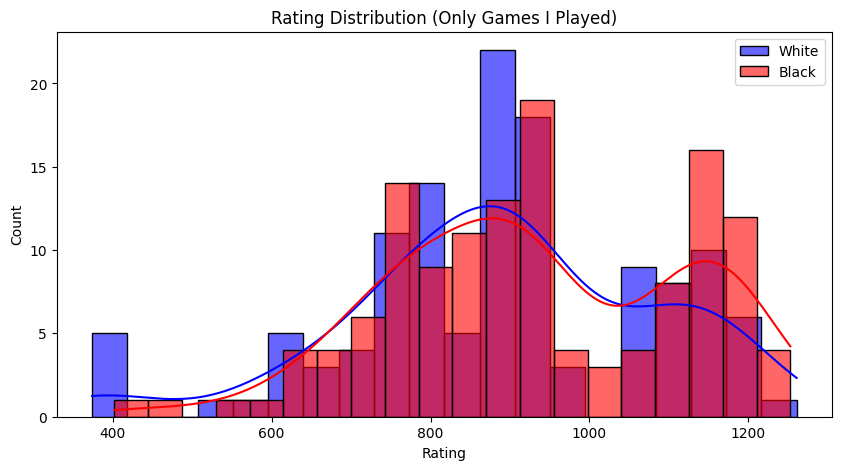

In [116]:
plt.figure(figsize=(10, 5))

# Plotting rating distribution for games where i played as White
sns.histplot(games_played_as_white['white.rating'], bins=20, kde=True, label="White", color="blue", alpha=0.6)

# Plotting rating distribution for games where i played as Black
sns.histplot(games_played_as_black['black.rating'], bins=20, kde=True, label="Black", color="red", alpha=0.6)

plt.legend()
plt.title("Rating Distribution (Only Games I Played)")
plt.xlabel("Rating")
plt.ylabel("Count")

# saving the image to the reports folder
save_figure("Rating_distribution.png")

plt.show()


Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Rating_vs_accuracy.png


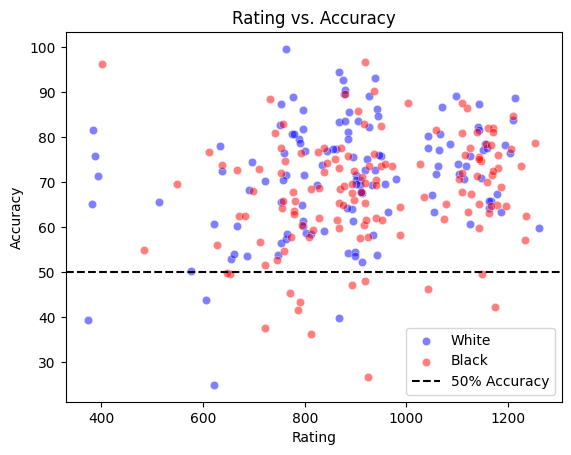

In [117]:
sns.scatterplot(x=games_played_as_white['white.rating'], y=games_played_as_white['accuracies.white'], alpha=0.5, label="White", color="blue")
sns.scatterplot(x=games_played_as_black['black.rating'], y=games_played_as_black['accuracies.black'], alpha=0.5, label="Black", color="red")
plt.axhline(y=50, color='black', linestyle='--', label="50% Accuracy")
plt.title("Rating vs. Accuracy")
plt.xlabel("Rating")
plt.ylabel("Accuracy")
plt.legend()

# saving the image to the reports folder
save_figure("Rating_vs_accuracy.png")

plt.show()

  Accuracy Range  Game Count
0         50-60%          33
1         60-70%          72
2         70-80%          87
3         80-90%          44
4        90-100%           8
Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Game_count_per_accuracy_range.png


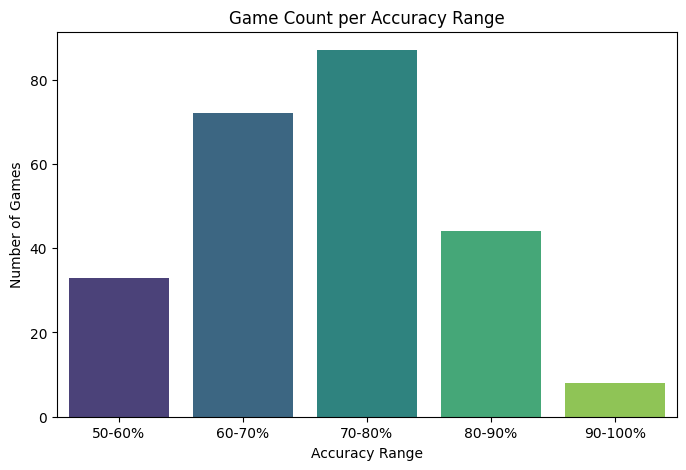

In [118]:
# Filtering games i played as White or Black
games_as_white = data[data['white.username'] == 'Fareed04']
games_as_black = data[data['black.username'] == 'Fareed04']

# Defining the accuracy ranges (only considering my games)
accuracy_ranges = {
    "50-60%": ((games_as_white['accuracies.white'] >= 50) & (games_as_white['accuracies.white'] < 60)).sum() +
              ((games_as_black['accuracies.black'] >= 50) & (games_as_black['accuracies.black'] < 60)).sum(),
    "60-70%": ((games_as_white['accuracies.white'] >= 60) & (games_as_white['accuracies.white'] < 70)).sum() +
              ((games_as_black['accuracies.black'] >= 60) & (games_as_black['accuracies.black'] < 70)).sum(),
    "70-80%": ((games_as_white['accuracies.white'] >= 70) & (games_as_white['accuracies.white'] < 80)).sum() +
              ((games_as_black['accuracies.black'] >= 70) & (games_as_black['accuracies.black'] < 80)).sum(),
    "80-90%": ((games_as_white['accuracies.white'] >= 80) & (games_as_white['accuracies.white'] < 90)).sum() +
              ((games_as_black['accuracies.black'] >= 80) & (games_as_black['accuracies.black'] < 90)).sum(),
    "90-100%": ((games_as_white['accuracies.white'] >= 90) & (games_as_white['accuracies.white'] <= 100)).sum() +
               ((games_as_black['accuracies.black'] >= 90) & (games_as_black['accuracies.black'] <= 100)).sum()
}

# Converting to DataFrame for better visualization
accuracy_df = pd.DataFrame(list(accuracy_ranges.items()), columns=["Accuracy Range", "Game Count"])

# Printing results
print(accuracy_df)

# Plotting the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=accuracy_df["Accuracy Range"], y=accuracy_df["Game Count"], palette="viridis")
plt.title("Game Count per Accuracy Range")
plt.xlabel("Accuracy Range")
plt.ylabel("Number of Games")

# saving the image to the reports folder
save_figure("Game_count_per_accuracy_range.png")

plt.show()


In [119]:
# CHECKING THE CORRELATION BETWEEN RATING AND ACCURACY
correlation_white = games_played_as_white['white.rating'].corr(games_played_as_white['accuracies.white'])
correlation_black = games_played_as_black['black.rating'].corr(games_played_as_black['accuracies.black'])

correlation_white, correlation_black

(np.float64(0.26781067716162), np.float64(0.18496686782204136))

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Rating_vs_accuracy_with_trend_lines.png


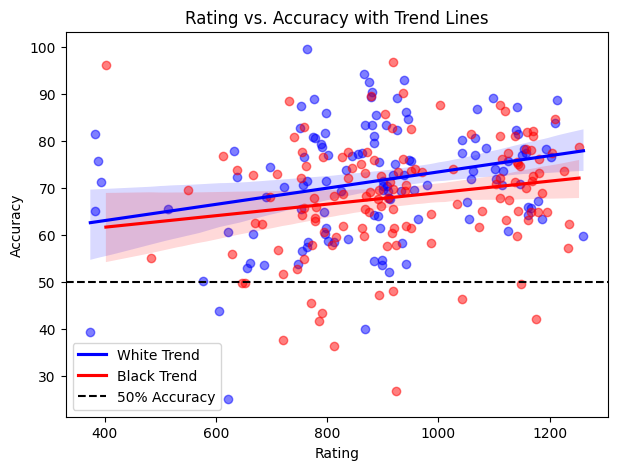

In [120]:
plt.figure(figsize=(7, 5))

# Scatter plot + regression line for White
sns.regplot(x=games_played_as_white['white.rating'], 
            y=games_played_as_white['accuracies.white'], 
            scatter_kws={'alpha': 0.5, 'color': 'blue'}, 
            line_kws={'color': 'blue', 'label': 'White Trend'})

# Scatter plot + regression line for Black
sns.regplot(x=games_played_as_black['black.rating'], 
            y=games_played_as_black['accuracies.black'], 
            scatter_kws={'alpha': 0.5, 'color': 'red'}, 
            line_kws={'color': 'red', 'label': 'Black Trend'})

plt.axhline(y=50, color='black', linestyle='--', label="50% Accuracy")
plt.title("Rating vs. Accuracy with Trend Lines")
plt.xlabel("Rating")
plt.ylabel("Accuracy")
plt.legend()

# saving the image to the reports folder
save_figure("Rating_vs_accuracy_with_trend_lines.png")

plt.show()


### Rating Progression

In [121]:
data["time_class"].value_counts()

time_class
rapid     1167
blitz      858
bullet       8
Name: count, dtype: int64

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Rapid_rating_progression_over_time.png


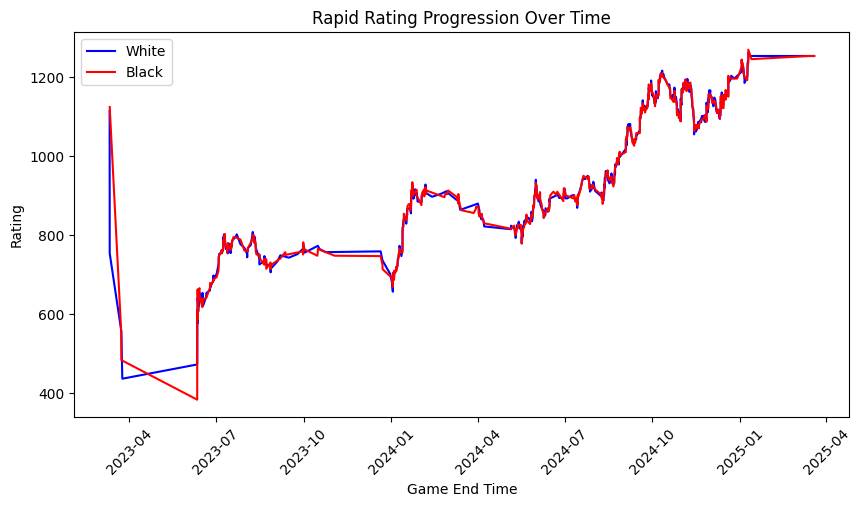

In [122]:
# FILTERING THE GAMES THAT WERE RAPID FORMAT, SORTING THEM BY THE
# GAME END TIME AND VISUALIZING THEM WITH A LINEPLOT
rapid_games = data[data["time_class"] == "rapid"]
rapid_games = rapid_games.sort_values(by='game_end_time')

rapid_games_as_white =  rapid_games[rapid_games['white.username'] == 'Fareed04']
rapid_games_as_black =  rapid_games[rapid_games['black.username'] == 'Fareed04']

plt.figure(figsize=(10, 5))

# Plotting rating progression for White
sns.lineplot(x=rapid_games_as_white['game_end_time'], 
             y=rapid_games_as_white['white.rating'], 
             label="White", color="blue")

# Plotting rating progression for Black
sns.lineplot(x=rapid_games_as_black['game_end_time'], 
             y=rapid_games_as_black['black.rating'], 
             label="Black", color="red")

plt.xlabel("Game End Time")
plt.ylabel("Rating")
plt.title("Rapid Rating Progression Over Time")
plt.legend()
plt.xticks(rotation=45)

# saving the image to the reports folder
save_figure("Rapid_rating_progression_over_time.png")

plt.show()


Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Blitz_rating_progression_over_time.png


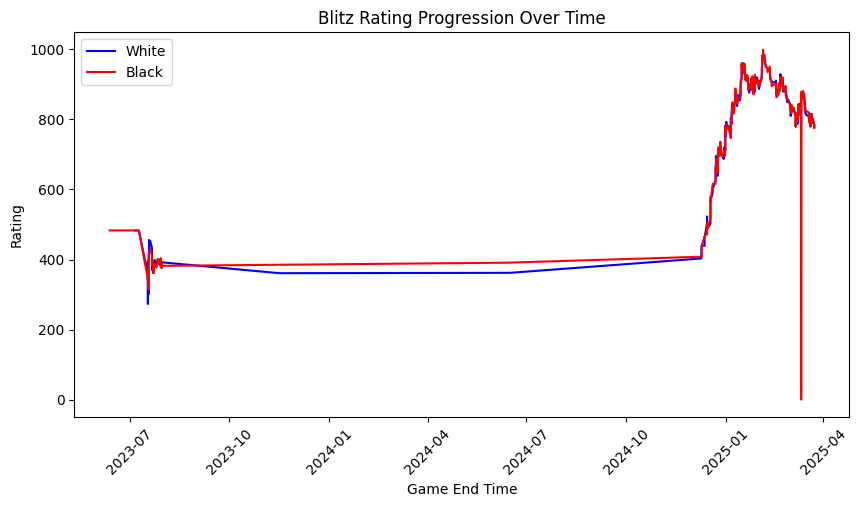

In [123]:
# FILTERING THE GAMES THAT WERE BLITZ FORMAT, SORTING THEM BY THE
# GAME END TIME AND VISUALIZING THEM WITH A LINEPLOT
blitz_games = data[data["time_class"] == "blitz"]
blitz_games = blitz_games.sort_values(by='game_end_time')

blitz_games_as_white =  blitz_games[blitz_games['white.username'] == 'Fareed04']
blitz_games_as_black =  blitz_games[blitz_games['black.username'] == 'Fareed04']

plt.figure(figsize=(10, 5))

# Plotting rating progression for White

sns.lineplot(x=blitz_games_as_white['game_end_time'], 
             y=blitz_games_as_white['white.rating'], 
             label="White", color="blue")

# Plotting rating progression for Black
sns.lineplot(x=blitz_games_as_black['game_end_time'], 
             y=blitz_games_as_black['black.rating'], 
             label="Black", color="red")

plt.xlabel("Game End Time")
plt.ylabel("Rating")
plt.title("Blitz Rating Progression Over Time")
plt.legend()
plt.xticks(rotation=45)

# saving the image to the reports folder
save_figure("Blitz_rating_progression_over_time.png")

plt.show()

Note: The sharp rating drop near the end of the graph is due to incorrect data in the Chess.com export. A manual check of my games confirms that my rating never dropped below 700 in 2025, so this should be considered an anomaly in the dataset.

#### WIN/LOSS RATIO

In [124]:
# DEFINING A FUNCTION TO GET THE DATA OF THE GAMES I PLAYED AS WHITE AND AS BLACK FOR A SPECIFIC CHESS FORMAT
def get_chess_format_data(format):
    format_games = data[data["time_class"] == format]
    format_games = format_games.sort_values(by='game_end_time')
    
    # Separating games where I played as White or Black
    format_games_as_white = format_games[format_games['white.username'] == 'Fareed04']
    format_games_as_black = format_games[format_games['black.username'] == 'Fareed04']

    # Mapping results to Win/Loss/Draw
    result_mapping = {
        "win": "Win",
        "checkmated": "Loss",
        "timeout": "Loss",
        "resigned": "Loss",
        "abandoned": "Loss",
        "stalemate": "Draw",
        "repetition": "Draw",
        "agreed": "Draw",
        "timevsinsufficient": "Draw",
        "insufficient": "Draw"
    }

    # Applying the mapping
    format_games_as_white["my_result"] = format_games_as_white["white.result"].replace(result_mapping)
    format_games_as_black["my_result"] = format_games_as_black["black.result"].replace(result_mapping)

    # Merging into a single dataset
    all_games = pd.concat([format_games_as_white, format_games_as_black])
    
    return all_games

rapid_games = get_chess_format_data("rapid")
blitz_games = get_chess_format_data("blitz")

# DEFINING A FUNCTION TO RETURN THE MONTHLY RESULTS FROM THE SPECIFIC FORMAT DATA
def get_monthly_results(format_games):
    # Ensuring game_end_time is in datetime format and extracting the month
    format_games["month"] = format_games["game_end_time"].dt.to_period("M").astype(str)

    # Grouping by month and count occurrences of each result
    monthly_results = format_games.groupby("month")["my_result"].value_counts().unstack(fill_value=0)

    return monthly_results

rapid_monthly_results = get_monthly_results(rapid_games)
blitz_monthly_results = get_monthly_results(blitz_games)

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Win&loss_trends_rapid.png
Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Win&loss_trends_blitz.png


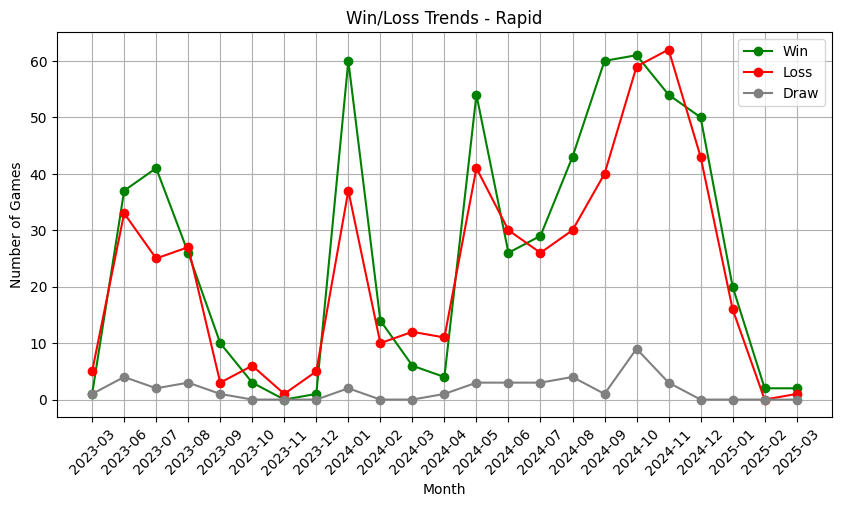

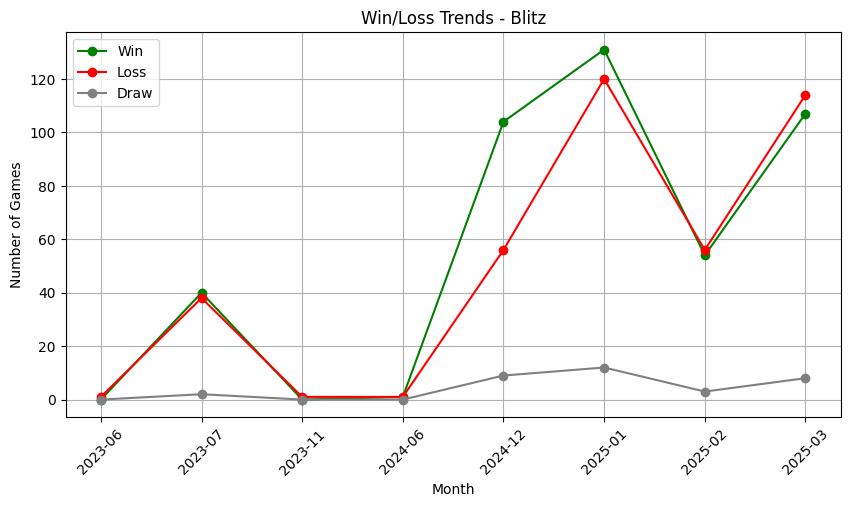

In [125]:
# DEFINING A FUNCTION TO PLOT THE WIN/LOSS TRENDS FOR EACH TIME CONTROL 
def plot_win_loss_trends(monthly_results, title):
    plt.figure(figsize=(10, 5))

    # Plotting each result type
    for result, color in zip(["Win", "Loss", "Draw"], ["green", "red", "gray"]):
        if result in monthly_results.columns:
            plt.plot(monthly_results.index, monthly_results[result], marker="o", label=result, color=color)

    plt.xlabel("Month")
    plt.ylabel("Number of Games")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
   

# Plotting for each time control
plot_win_loss_trends(rapid_monthly_results, "Win/Loss Trends - Rapid")

# saving the image to the reports folder
save_figure("Win&loss_trends_rapid.png")

plot_win_loss_trends(get_monthly_results(blitz_games), "Win/Loss Trends - Blitz")

# saving the image to the reports folder
save_figure("Win&loss_trends_blitz.png")

plt.show()

#### OPENING EFFECTIVENESS

In [126]:
rapid_games.head()

,time_control,rated,time_class,eco,accuracies.white,accuracies.black,white.rating,white.result,white.username,black.rating,black.result,black.username,game_end_time,opening,my_result,month
0,1200,True,rapid,https://www.chess.com/openings/Nimzowitsch-Lar...,70.7,88.2,1114,checkmated,Fareed04,1444,win,montecastro69,2023-03-11 14:21:58,Nimzowitsch Larsen Attack Modern Variation 2.B...,Loss,2023-03
2,1800,True,rapid,https://www.chess.com/openings/Kings-Fianchett...,56.5,85.7,754,checkmated,Fareed04,477,win,alternatesoul,2023-03-11 16:32:41,Kings Fianchetto Opening Slav Formation,Loss,2023-03
4,1800,True,rapid,https://www.chess.com/openings/Kings-Fianchett...,-1.0,-1.0,557,repetition,Fareed04,574,repetition,alternatesoul,2023-03-23 20:47:06,Kings Fianchetto Opening 1...d5,Draw,2023-03
6,1800,True,rapid,https://www.chess.com/openings/Kings-Fianchett...,-1.0,-1.0,437,checkmated,Fareed04,585,win,alternatesoul,2023-03-24 21:35:08,Kings Fianchetto Opening 1...e5,Loss,2023-03
9,1800,True,rapid,https://www.chess.com/openings/Kings-Fianchett...,-1.0,-1.0,473,win,Fareed04,388,resigned,enrico874,2023-06-11 11:14:56,Kings Fianchetto Opening 1...e5 2.Bg2,Win,2023-06


In [128]:
# DEFINING A FUNCTION TO COUNT THE WINS LOSSES AND DRAWS FOR EACH OPENING AND COMPUTE THE WIN RATE
def opening_performance(format_games, color):
    if color == "white":
        relevant_games = format_games[format_games["white.username"] == USERNAME]
    else:
        relevant_games = format_games[format_games["black.username"] == USERNAME]

    # Counting wins, losses, and draws per opening
    opening_stats = relevant_games.groupby("opening")["my_result"].value_counts().unstack(fill_value=0)

    # Renaming columns to maintain consistency
    opening_stats.columns.name = None  # Removing 'my_result' as a header
    opening_stats = opening_stats.rename(columns={"Win": "Win", "Loss": "Loss", "Draw": "Draw"})

    # Computing total games and win rate
    opening_stats["Total Games"] = opening_stats.sum(axis=1)
    opening_stats["Win Rate (%)"] = (opening_stats["Win"] / opening_stats["Total Games"]) * 100

    return opening_stats.sort_values("Total Games", ascending=False)

# Separating performance by color and time control
rapid_opening_white = opening_performance(rapid_games, "white")
rapid_opening_black = opening_performance(rapid_games, "black")

blitz_opening_white = opening_performance(blitz_games, "white")
blitz_opening_black = opening_performance(blitz_games, "black")

# Displaying results
rapid_opening_white.head(10), rapid_opening_black.head(10)


(                                                    Draw  Loss  Win  \
 opening                                                               
 Queens Pawn Opening Zukertort Chigorin Variatio...     0    15   12   
 Queens Pawn Opening Chigorin Variation 2...Nf6         2     7   10   
 Queens Pawn Opening Zukertort Variation                0     6   12   
 Queens Pawn Opening Horwitz Defense 2.Nf3              0     8    9   
 Queens Pawn Opening Chigorin Variation 2...Nf6 ...     0     9    5   
 Queens Pawn Opening Zukertort Chigorin Variatio...     0     7    7   
 Queens Pawn Opening Chigorin Variation 2...e6          2     6    4   
 Englund Gambit 2.dxe5 Nc6 3.Nf3 Qe7                    0     3    9   
 Queens Pawn Opening Anti Torre Attack                  1     4    5   
 Queens Pawn Opening Zukertort Variation 2...c6 ...     0     5    5   
 
                                                     Total Games  Win Rate (%)  
 opening                                             

In [133]:
blitz_opening_white.head(10), blitz_opening_black.head(10)

(                                                    Draw  Loss  Win  \
 opening                                                               
 Queens Pawn Opening Accelerated London System          3    28   27   
 Queens Pawn Opening Accelerated London System 2...     0     7   15   
 Queens Pawn Opening Horwitz Defense 2.Bf4              2     8    9   
 Englund Gambit 2.dxe5 Nc6                              0     7    6   
 Queens Pawn Opening 1...d6 2.Bf4                       0     4    6   
 English Defense                                        0     5    4   
 Queens Pawn Opening Zukertort Chigorin Variatio...     0     5    4   
 Queens Pawn Opening Accelerated London System 2...     1     4    4   
 Englund Gambit Soller Gambit                           0     3    6   
 Old Benoni Defense 2.dxc5                              0     5    4   
 
                                                     Total Games  Win Rate (%)  
 opening                                             

#### WIN RATE VS OPENINGS

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Rapid_win_rate_vs_opening_as_white.png


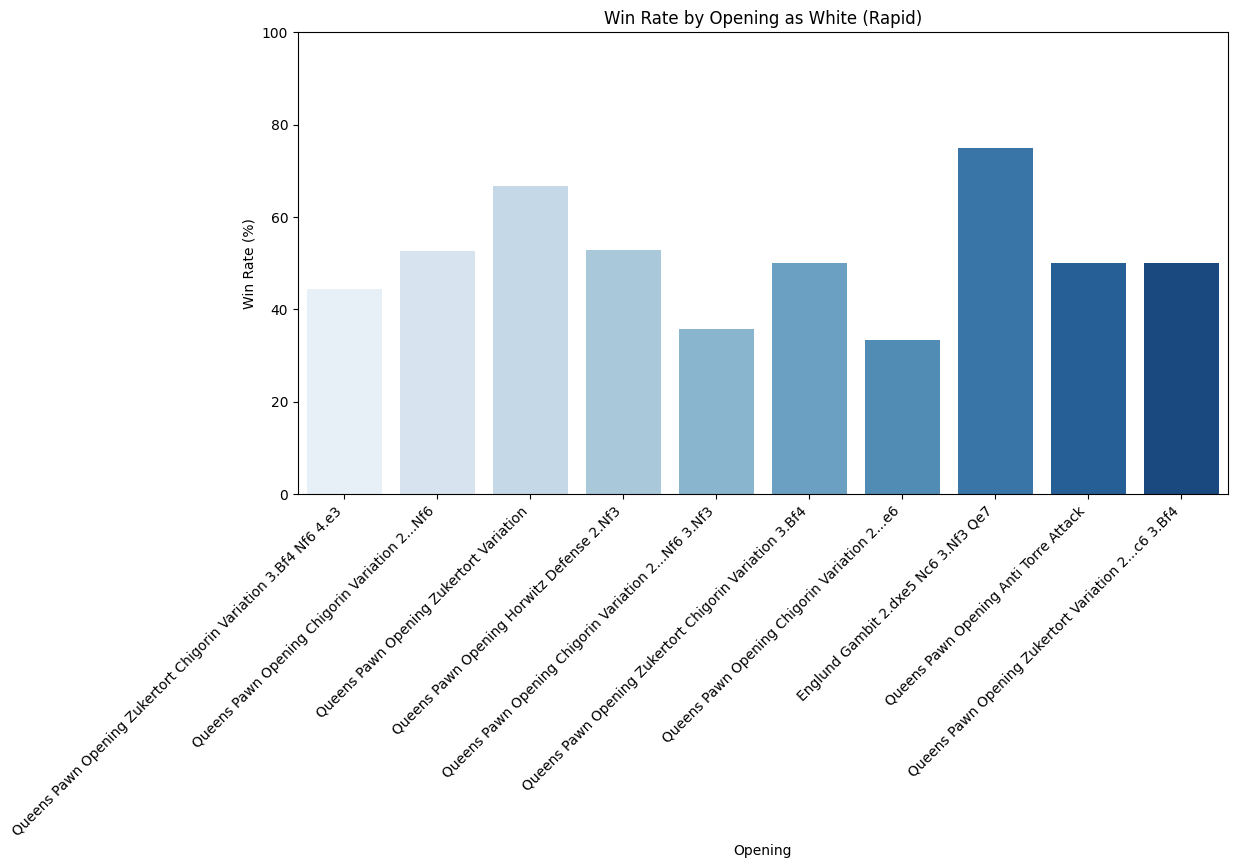

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Rapid_win_rate_vs_opening_as_black.png


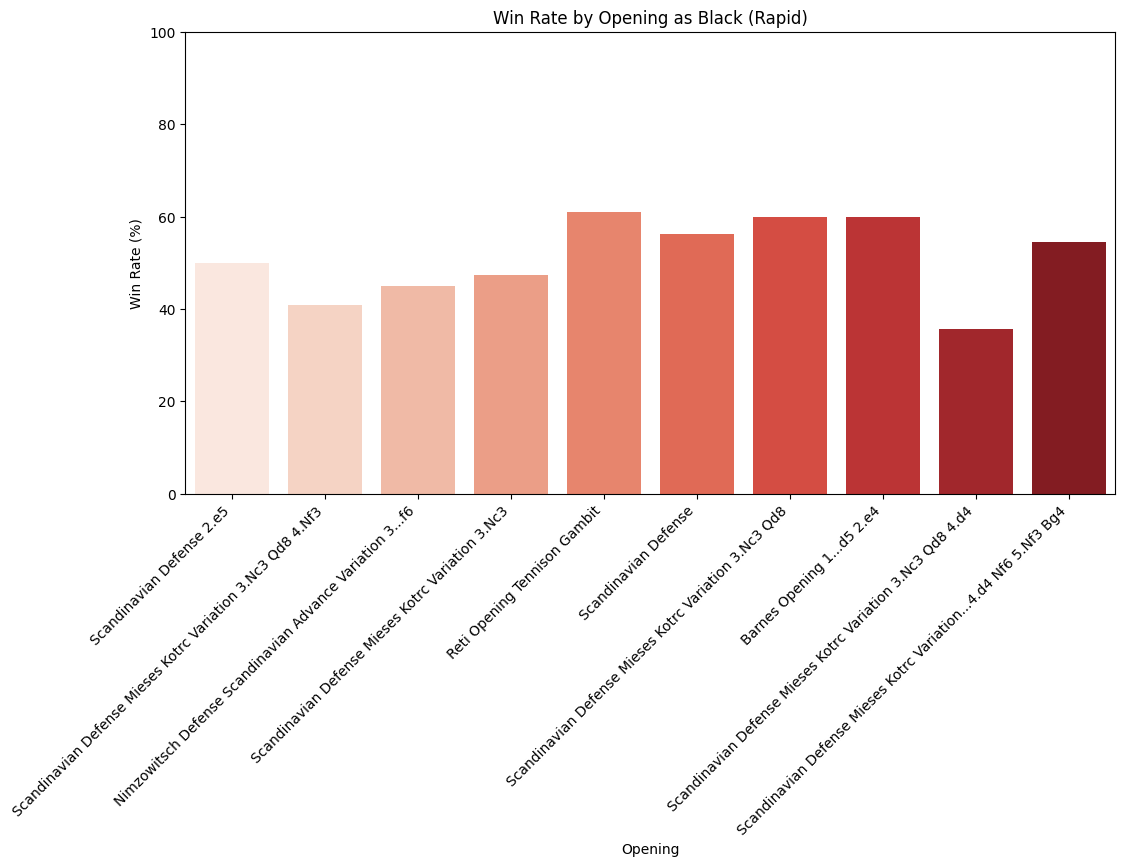

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Blitz_win_rate_vs_opening_as_white.png


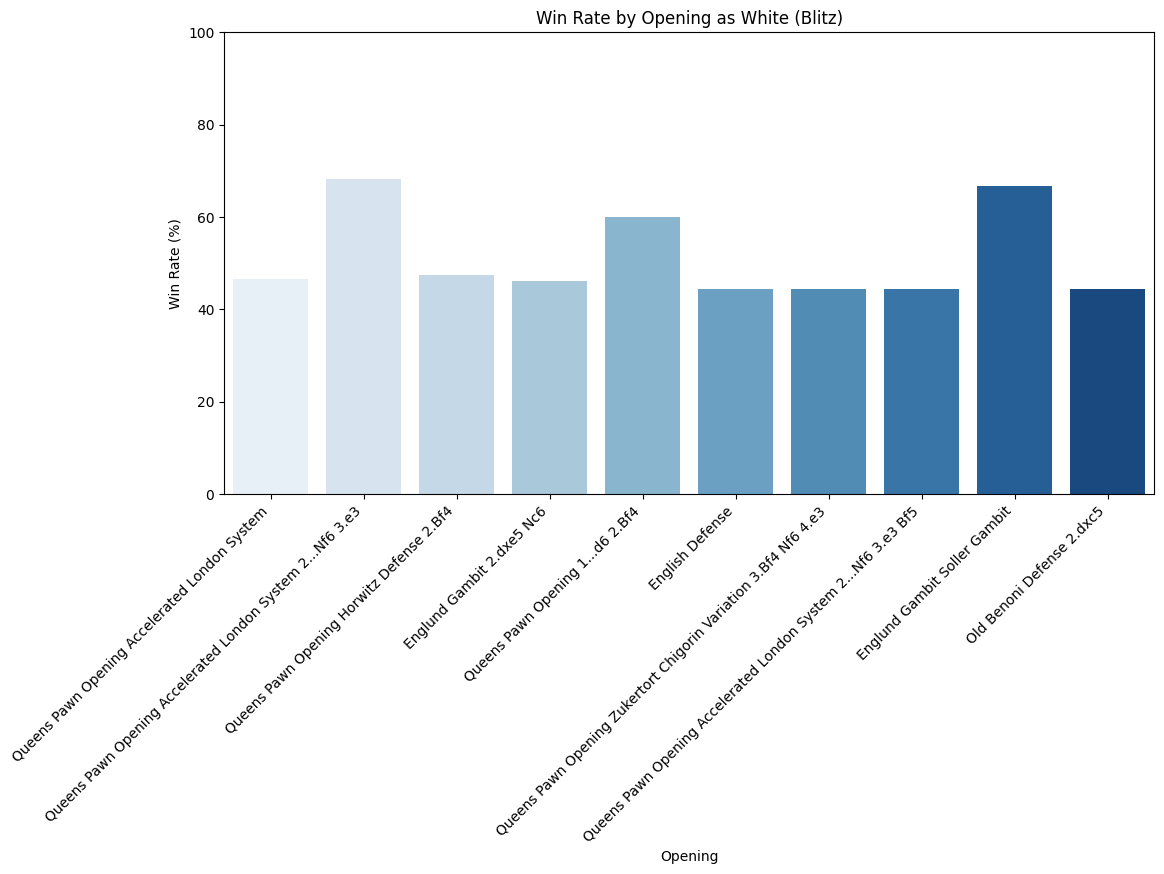

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Blitz_win_rate_vs_opening_as_black.png


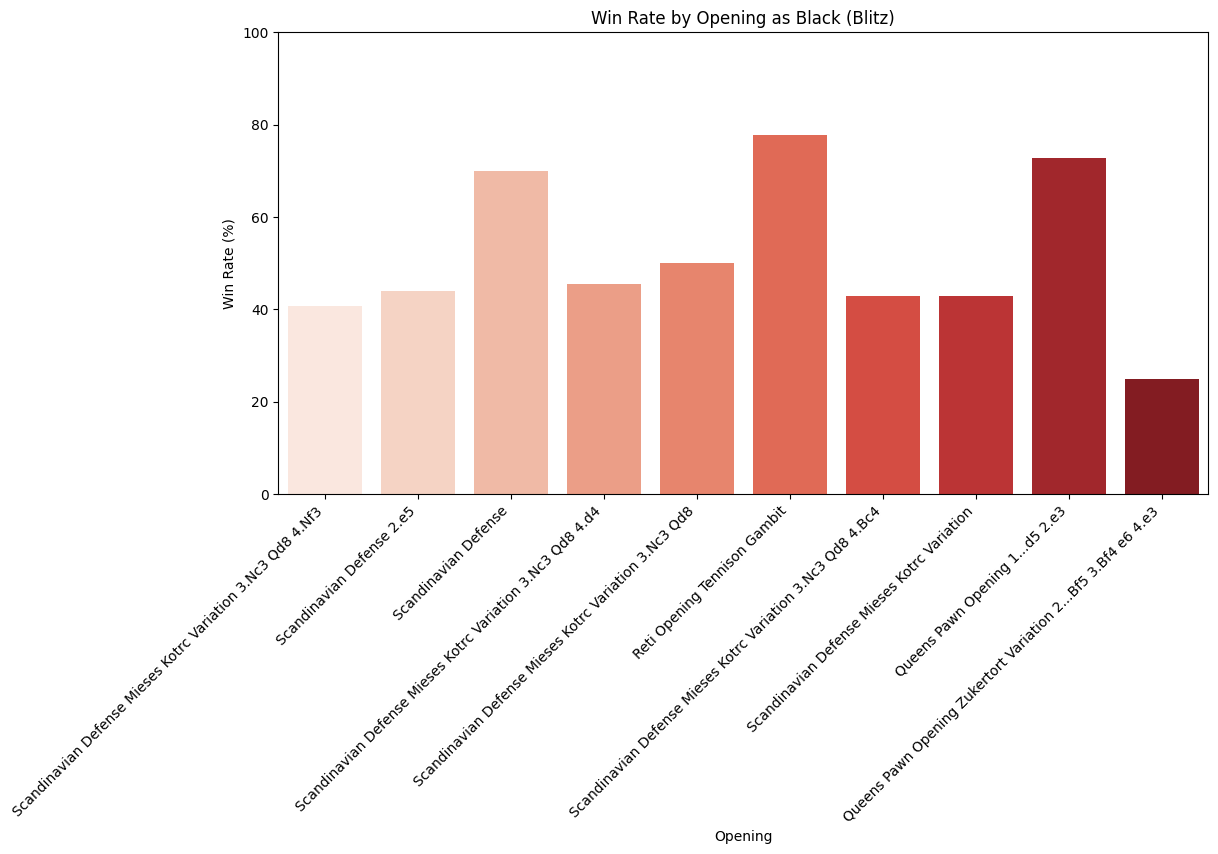

In [129]:
# DEFINING A FUNCTION TO PLOT THE WIN RATES AGAINST THE OPENINGS FOR BLACK AND WHITE
def plot_win_rate_by_opening(format_games, title):
    # Separating games by color
    white_games = format_games[format_games['white.username'] == 'Fareed04']
    black_games = format_games[format_games['black.username'] == 'Fareed04']

    # Computing win rates for White openings
    white_opening_stats = white_games.groupby("opening")["my_result"].value_counts().unstack(fill_value=0)
    white_opening_stats["Total Games"] = white_opening_stats.sum(axis=1)
    white_opening_stats["Win Rate (%)"] = (white_opening_stats["Win"] / white_opening_stats["Total Games"]) * 100

    # Computing win rates for Black openings
    black_opening_stats = black_games.groupby("opening")["my_result"].value_counts().unstack(fill_value=0)
    black_opening_stats["Total Games"] = black_opening_stats.sum(axis=1)
    black_opening_stats["Win Rate (%)"] = (black_opening_stats["Win"] / black_opening_stats["Total Games"]) * 100

    # Sorting by most played openings and selected top 10
    top_white_openings = white_opening_stats.sort_values("Total Games", ascending=False).head(10)
    top_black_openings = black_opening_stats.sort_values("Total Games", ascending=False).head(10)

    # Plotting the White openings
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_white_openings.index, y=top_white_openings["Win Rate (%)"], palette="Blues")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Win Rate (%)")
    plt.xlabel("Opening")
    plt.title(f"Win Rate by Opening as White ({title})")
    plt.ylim(0, 100)
    
    # saving the image to the reports folder
    save_figure(f"{title}_win_rate_vs_opening_as_white.png")

    plt.show()

    # Plotting the Black openings
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_black_openings.index, y=top_black_openings["Win Rate (%)"], palette="Reds")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Win Rate (%)")
    plt.xlabel("Opening")
    plt.title(f"Win Rate by Opening as Black ({title})")
    plt.ylim(0, 100)
        
    # saving the image to the reports folder
    save_figure(f"{title}_win_rate_vs_opening_as_black.png")

    plt.show()

# Calling the functions for both Rapid and Blitz
plot_win_rate_by_opening(rapid_games, "Rapid")
plot_win_rate_by_opening(blitz_games, "Blitz")


#### OPENING FREQUENCY

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Rapid_most_played_openings_as_white.png


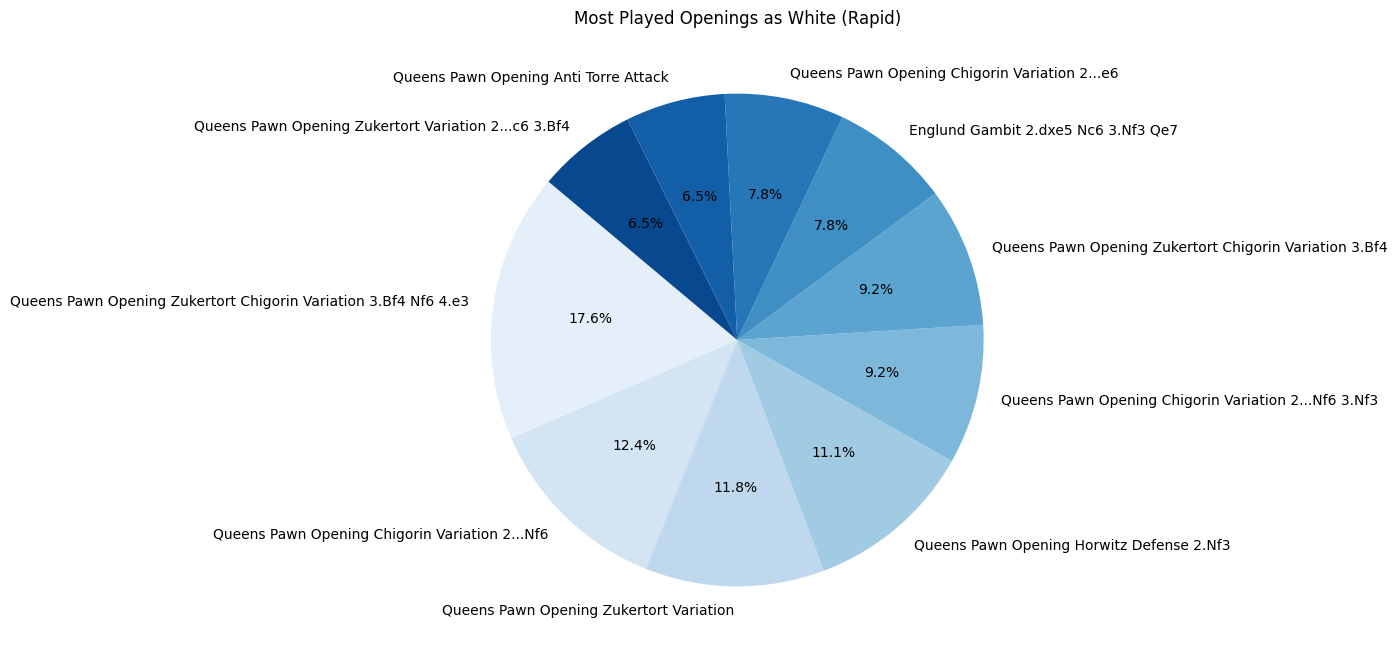

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Rapid_most_played_openings_as_black.png


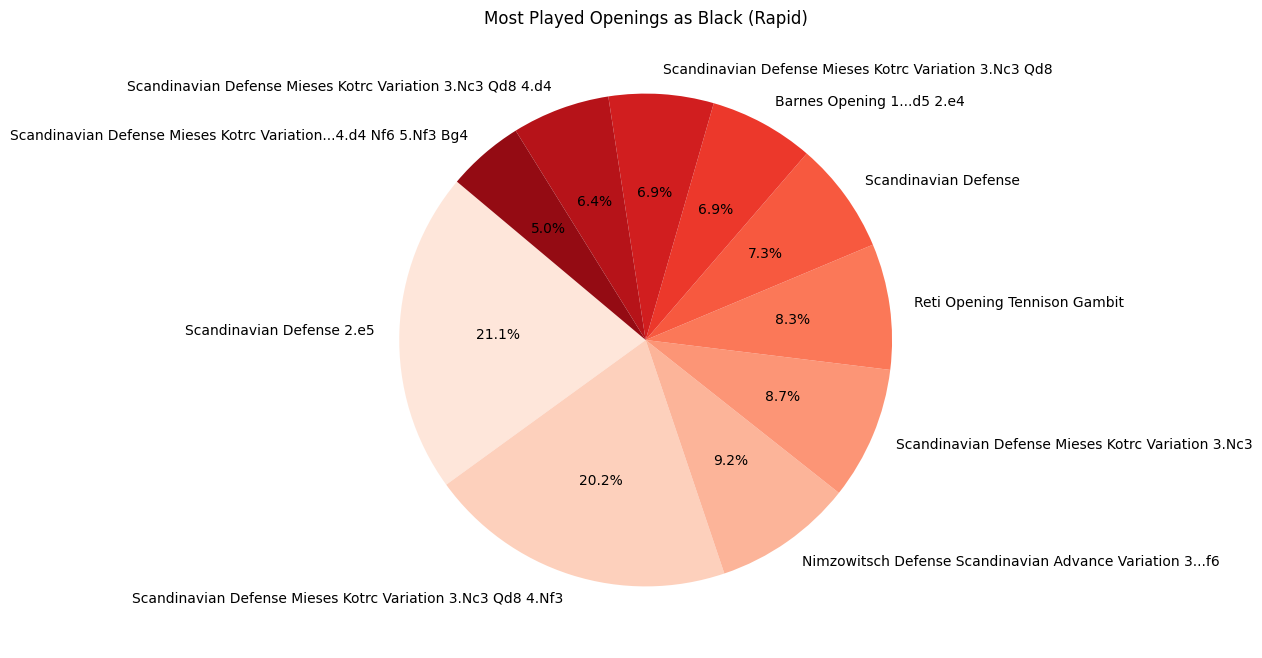

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Blitz_most_played_openings_as_white.png


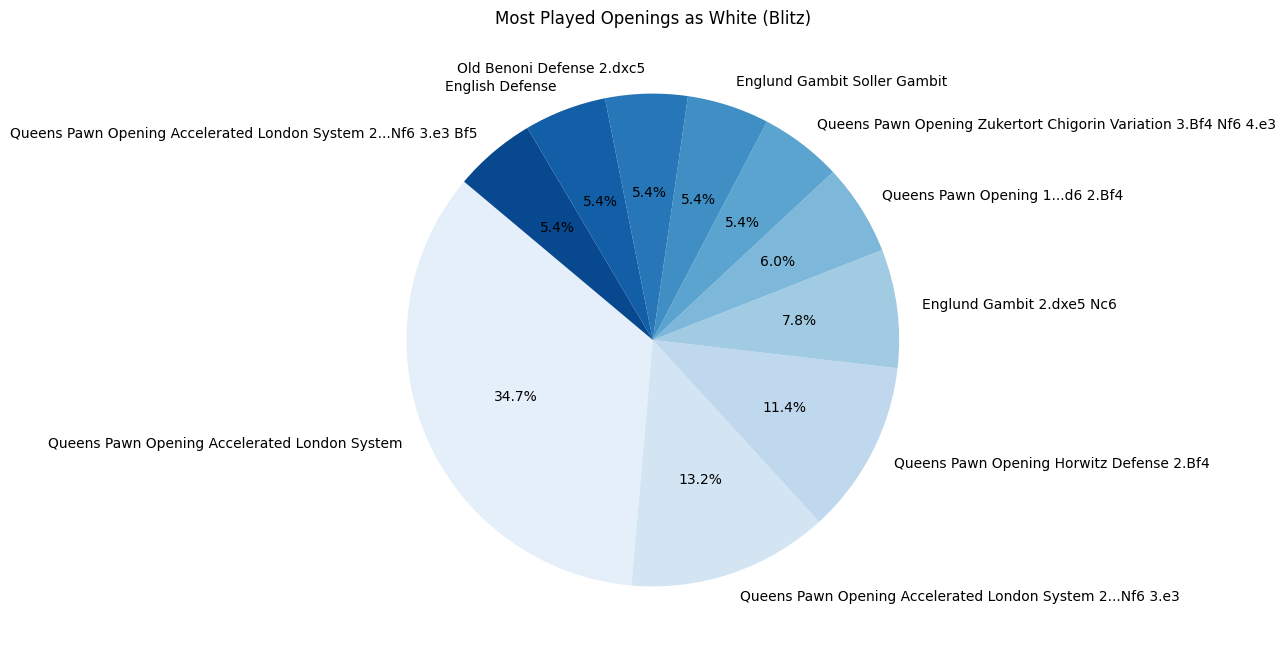

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Blitz_most_played_openings_as_black.png


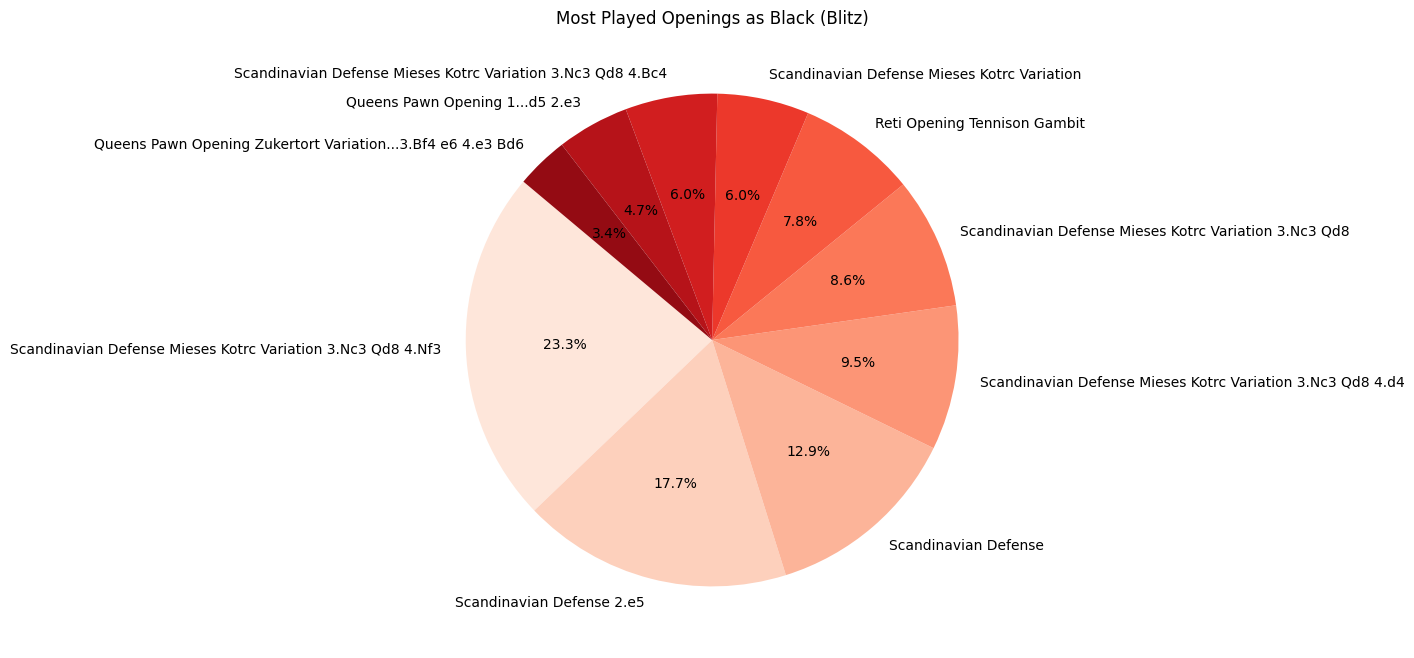

In [130]:
# DEFINING A FUNCTION TO VISUALIZE THE OPENING FREQUENCIES FOR BLACK AND WHITE IN EACH FORMAT ON A PIE CHART
def plot_opening_frequency(format_games, title):
    # Separating games by color
    white_games = format_games[format_games['white.username'] == 'Fareed04']
    black_games = format_games[format_games['black.username'] == 'Fareed04']

    # Counting most played openings for White
    white_opening_counts = white_games["opening"].value_counts().head(10)

    # Counting most played openings for Black
    black_opening_counts = black_games["opening"].value_counts().head(10)

    # Plotting White openings pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(white_opening_counts, labels=white_opening_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Blues", len(white_opening_counts)))
    plt.title(f"Most Played Openings as White ({title})")
        
    # saving the image to the reports folder
    save_figure(f"{title}_most_played_openings_as_white.png")

    plt.show()

    # Plotting Black openings pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(black_opening_counts, labels=black_opening_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Reds", len(black_opening_counts)))
    plt.title(f"Most Played Openings as Black ({title})")
        
    # saving the image to the reports folder
    save_figure(f"{title}_most_played_openings_as_black.png")
    
    plt.show()

# Calling tthe function for both Rapid and Blitz
plot_opening_frequency(rapid_games, "Rapid")
plot_opening_frequency(blitz_games, "Blitz")


#### GAME OUTCOMES ACROSS OPENINGS

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Rapid_game_outcomes_for_the_most_played_openings_as_white.png


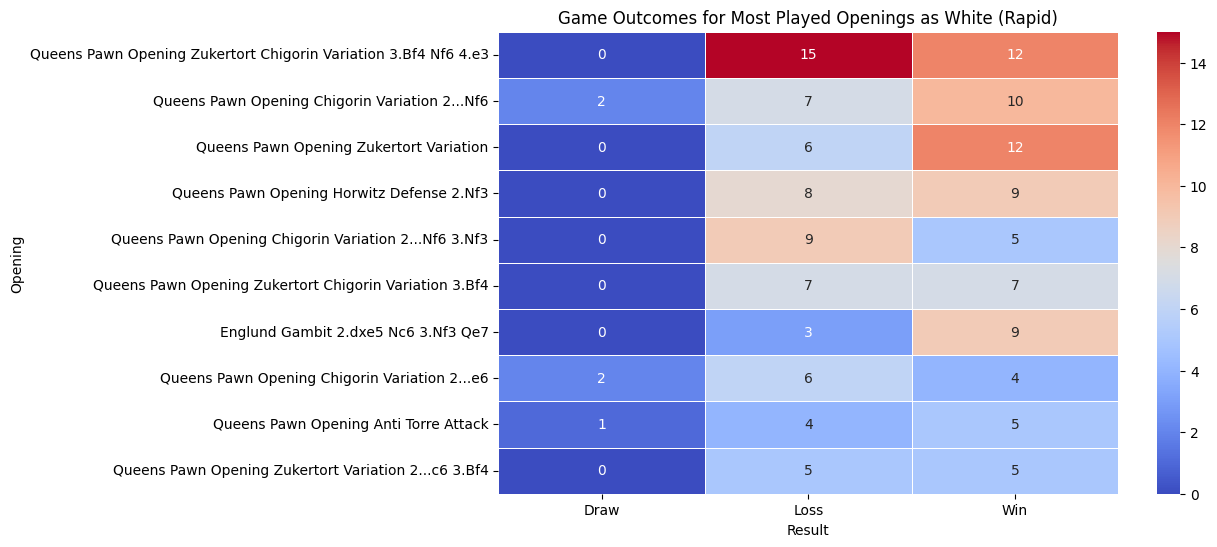

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Rapid_game_outcomes_for_the_most_played_openings_as_black.png


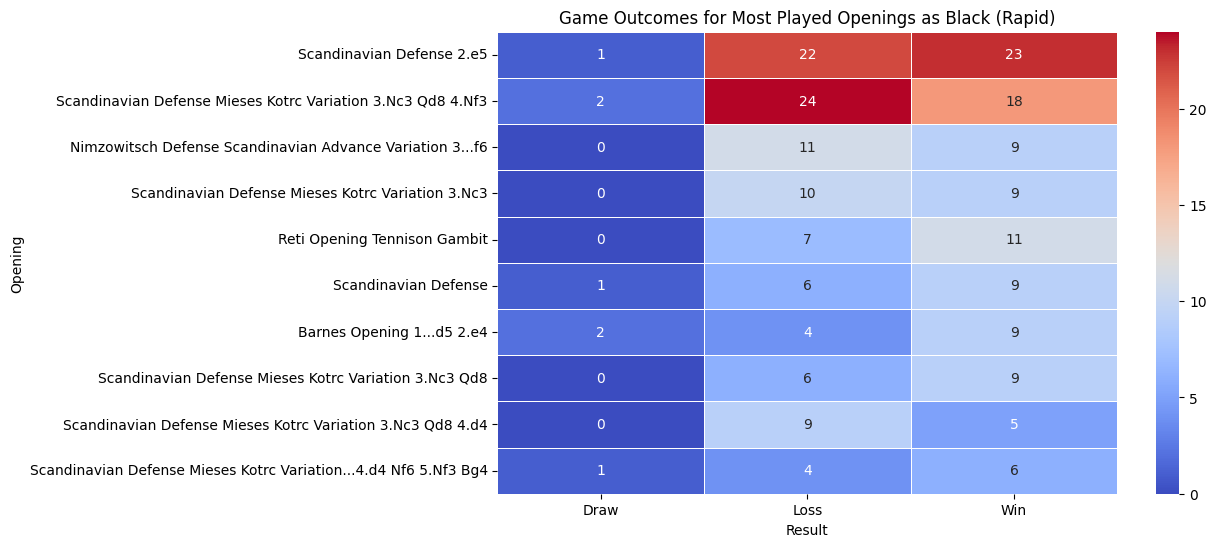

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Blitz_game_outcomes_for_the_most_played_openings_as_white.png


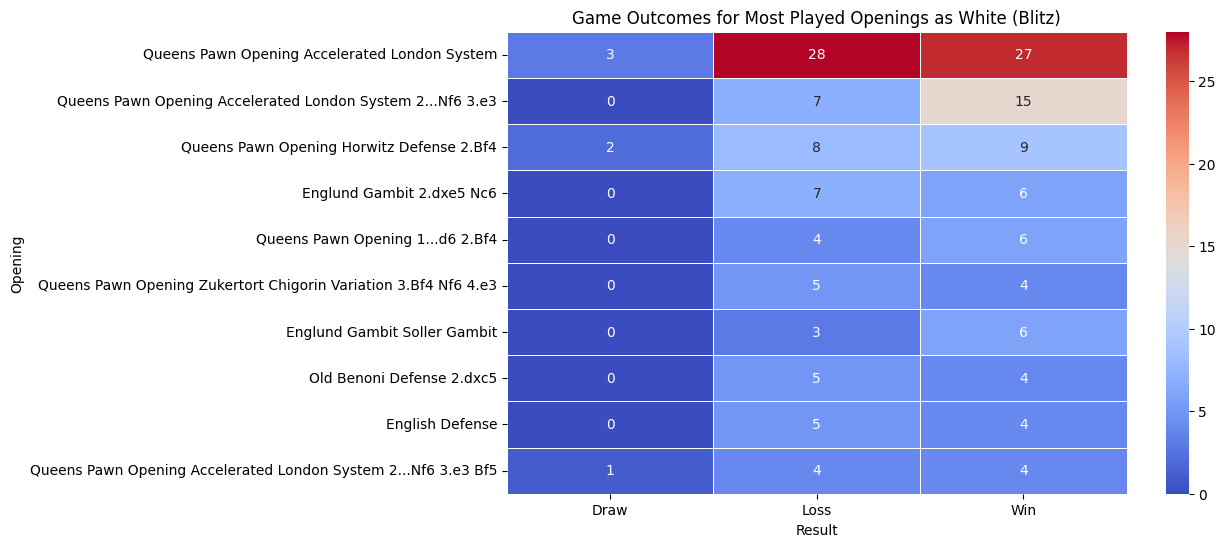

Saved: c:\Users\ologu\Desktop\PYTHON DATA SCIENCE\CHESS DATA ANALYSIS\reports\figures\Blitz_game_outcomes_for_the_most_played_openings_as_black.png


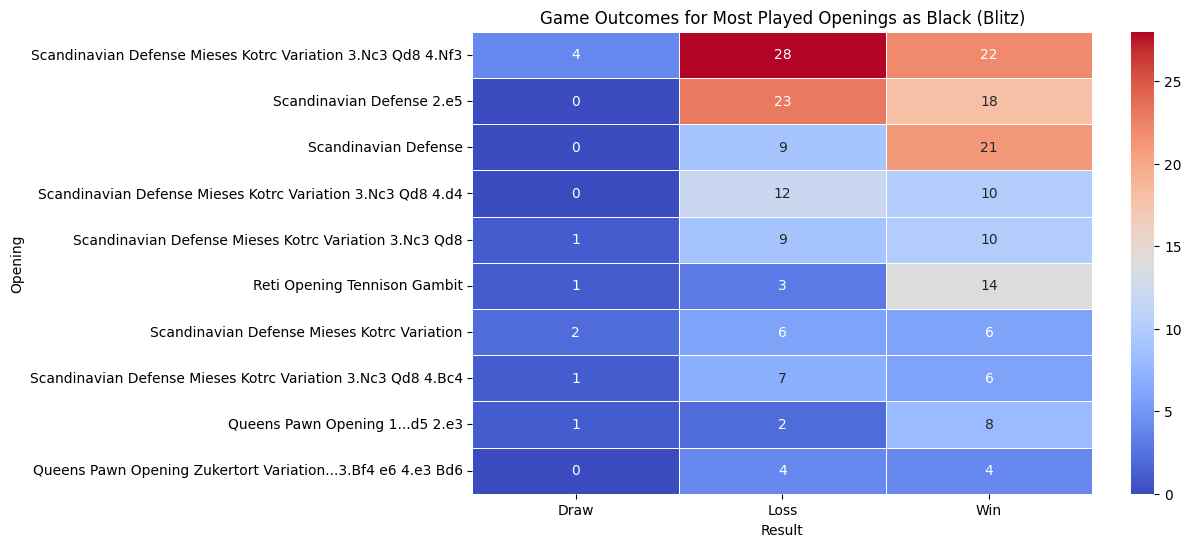

In [131]:
# DEFINING A FUNCTION TO VISUALIZE THE GAME OUTCOMES FOR THE MOST PLAYED OPENINGS USING A HEATMAP
def plot_opening_heatmap_by_color(format_games, color, title):
    # Filtering games based on color
    if color == "white":
        relevant_games = format_games[format_games["white.username"] == USERNAME]
    else:
        relevant_games = format_games[format_games["black.username"] == USERNAME]

    # Grouping by opening and count results
    opening_stats = relevant_games.groupby("opening")["my_result"].value_counts().unstack(fill_value=0)

    # Selecting only the most played openings
    most_played_openings = relevant_games["opening"].value_counts().head(10).index
    opening_stats = opening_stats.loc[most_played_openings]

    # Plotting heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(opening_stats, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
    plt.title(f"Game Outcomes for Most Played Openings as {color.capitalize()} ({title})")
    plt.xlabel("Result")
    plt.ylabel("Opening")
        
    # saving the image to the reports folder
    save_figure(f"{title}_game_outcomes_for_the_most_played_openings_as_{color}.png")

    plt.show()

# Calling the function for White & Black in both Rapid and Blitz
plot_opening_heatmap_by_color(rapid_games, "white", "Rapid")
plot_opening_heatmap_by_color(rapid_games, "black", "Rapid")
plot_opening_heatmap_by_color(blitz_games, "white", "Blitz")
plot_opening_heatmap_by_color(blitz_games, "black", "Blitz")


In [132]:
print(len(data["opening"].value_counts()))

463
